In [14]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import catboost as cat
import lightgbm as lgb
from sklearn.metrics import mean_squared_log_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
from copy import deepcopy
from functools import partial
from itertools import combinations
import random
import gc

# Import sklearn classes for model selection, cross validation, and performance evaluation
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble
import seaborn as sns
from category_encoders import OneHotEncoder, OrdinalEncoder, CountEncoder, CatBoostEncoder
from imblearn.under_sampling import RandomUnderSampler

# Import libraries for Hypertuning
import optuna

# Import libraries for gradient boosting
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoost, CatBoostRegressor, CatBoostClassifier
from catboost import Pool

# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from collections import OrderedDict
import optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# Modelling imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error
import xgboost as xgb

In [42]:
train_df = pd.read_csv("train.csv" , index_col= ["id"])
train_df
train2_df = pd.read_csv("train.csv")

In [4]:
test_df = pd.read_csv("test.csv")
test_df

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,360336,7.24,4.0,1.0,0.0,2.0,10.80,0.0,1.0,7.0,20319.0,0.0,0.0,0.0,0.0,0.0
1,360337,6.90,2.0,2.0,2.0,3.0,8.51,1.0,0.0,4.0,33858.0,1.0,0.0,1.0,1.0,1.0
2,360338,8.34,3.0,0.0,0.0,3.0,8.77,0.0,1.0,14.0,39696.0,0.0,0.0,1.0,1.0,0.0
3,360339,5.48,2.0,3.0,3.0,2.0,21.90,1.0,0.0,9.0,23688.0,1.0,1.0,1.0,1.0,1.0
4,360340,4.80,3.0,2.0,0.0,2.0,10.90,1.0,0.0,11.0,27694.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240219,600555,8.60,4.0,0.0,0.0,1.0,8.39,0.0,0.0,16.0,38382.0,0.0,0.0,0.0,0.0,0.0
240220,600556,4.30,2.0,2.0,0.0,4.0,7.88,1.0,0.0,4.0,30268.0,0.0,0.0,0.0,0.0,0.0
240221,600557,6.30,3.0,0.0,0.0,3.0,11.50,0.0,0.0,13.0,39696.0,0.0,0.0,1.0,1.0,0.0
240222,600558,7.94,2.0,0.0,0.0,2.0,8.33,1.0,0.0,8.0,23759.0,1.0,0.0,1.0,1.0,1.0


In [5]:
original = pd.read_csv("train_dataset.csv" )
original

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,2.68,2.0,1.0,0.0,2.0,6.30,1.0,0.0,22.0,30584.0,1.0,1.0,1.0,1.0,1.0,79.59
1,5.73,3.0,5.0,5.0,3.0,18.70,1.0,0.0,30.0,20319.0,0.0,0.0,0.0,0.0,0.0,118.36
2,2.62,2.0,1.0,1.0,1.0,9.21,0.0,0.0,9.0,20319.0,0.0,0.0,0.0,0.0,0.0,67.20
3,11.73,3.0,1.0,1.0,3.0,10.90,1.0,1.0,15.0,23112.0,1.0,1.0,1.0,1.0,1.0,60.87
4,4.82,2.0,1.0,1.0,3.0,8.15,0.0,0.0,7.0,38382.0,0.0,0.0,0.0,0.0,0.0,86.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51358,3.70,2.0,4.0,4.0,1.0,10.40,1.0,1.0,18.0,34452.0,1.0,0.0,0.0,0.0,1.0,147.17
51359,10.36,4.0,2.0,0.0,2.0,9.43,0.0,0.0,20.0,30797.0,1.0,1.0,1.0,1.0,1.0,92.57
51360,11.19,3.0,3.0,0.0,3.0,18.50,0.0,0.0,5.0,30797.0,1.0,1.0,1.0,1.0,1.0,92.57
51361,3.78,3.0,1.0,1.0,2.0,19.80,0.0,1.0,8.0,23598.0,0.0,0.0,0.0,0.0,1.0,135.92


In [6]:
train_df.shape, test_df.shape, original.shape 

((360336, 16), (240224, 16), (51363, 16))

In [9]:
train_df.columns , original.columns

(Index(['store_sales(in millions)', 'unit_sales(in millions)', 'total_children',
        'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
        'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
        'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist',
        'cost'],
       dtype='object'),
 Index(['store_sales(in millions)', 'unit_sales(in millions)', 'total_children',
        'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
        'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
        'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist',
        'cost'],
       dtype='object'))

concatlememz gerekiyor bunun için traindeki id numarasından devam eden bir id indexine ihtiyacımız var original dataset için 

id yi çıkarttık eda için gereksiz bir feature

In [12]:
cols = train_df.columns.to_list()
cols.remove("id")


ValueError: list.remove(x): x not in list

aşağıda yardım için bir fonskiyn tanıttık

In [17]:
def set_frame_style(df, caption=""):
    """Helper function to set dataframe presentation style.
    """
    return df.style.background_gradient(cmap='Greens').set_caption(caption).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'darkgreen'),
        ('font-size', '18px'),
        ('font-weight','bold')
    ]}])

In [22]:
display(set_frame_style(train_df[cols].head(),"first few rows in data"))
display(set_frame_style(train_df[cols].describe(),"summmary istatistics"))

display(set_frame_style(train_df[cols].nunique().to_frame().rename({0:'Unique Value Count'}, axis=1).transpose(), 'Unique Value Counts In Each Column'))
display(set_frame_style(train_df[cols].isna().any().to_frame().transpose(),"columns with nan "))

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
id,,,,,,,,,,,,,,,,
0,8.610000,3.000000,2.000000,2.000000,2.000000,10.300000,1.000000,0.000000,32.000000,36509.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.090000
1,5.000000,2.000000,4.000000,0.000000,3.000000,6.660000,1.000000,0.000000,1.000000,28206.000000,1.000000,0.000000,0.000000,0.000000,0.000000,121.800000
2,14.080000,4.000000,0.000000,0.000000,3.000000,21.300000,1.000000,0.000000,26.000000,21215.000000,1.000000,0.000000,0.000000,0.000000,0.000000,83.510000
3,4.020000,3.000000,5.000000,0.000000,0.000000,14.800000,0.000000,1.000000,36.000000,21215.000000,1.000000,0.000000,0.000000,0.000000,0.000000,66.780000
4,2.130000,3.000000,5.000000,0.000000,3.000000,17.000000,1.000000,1.000000,20.000000,27694.000000,1.000000,1.000000,1.000000,1.000000,1.000000,111.510000


,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,6.337376,3.043881,2.456482,0.689390,2.203813,13.822071,0.568086,0.327797,18.972706,28180.333442,0.564839,0.277394,0.504807,0.504832,0.503191,99.614729
std,3.307980,0.784676,1.488992,1.214732,1.084293,4.614792,0.495343,0.469411,10.212912,5968.874074,0.495779,0.447713,0.499978,0.499977,0.499991,29.939435
min,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.720000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.320000
50%,5.780000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000
75%,8.400000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
Unique Value Count,1044,6,6,6,5,384,2,2,36,20,2,2,2,2,2,328


,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Correlation GRAFİKLERİ : 

SOME_İNFOS:
What does PLT tight layout do?
tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area. This is an experimental feature and may not work for some cases. It only checks the extents of ticklabels, axis labels, and titles. An alternative to tight_layout is constrained_layout.

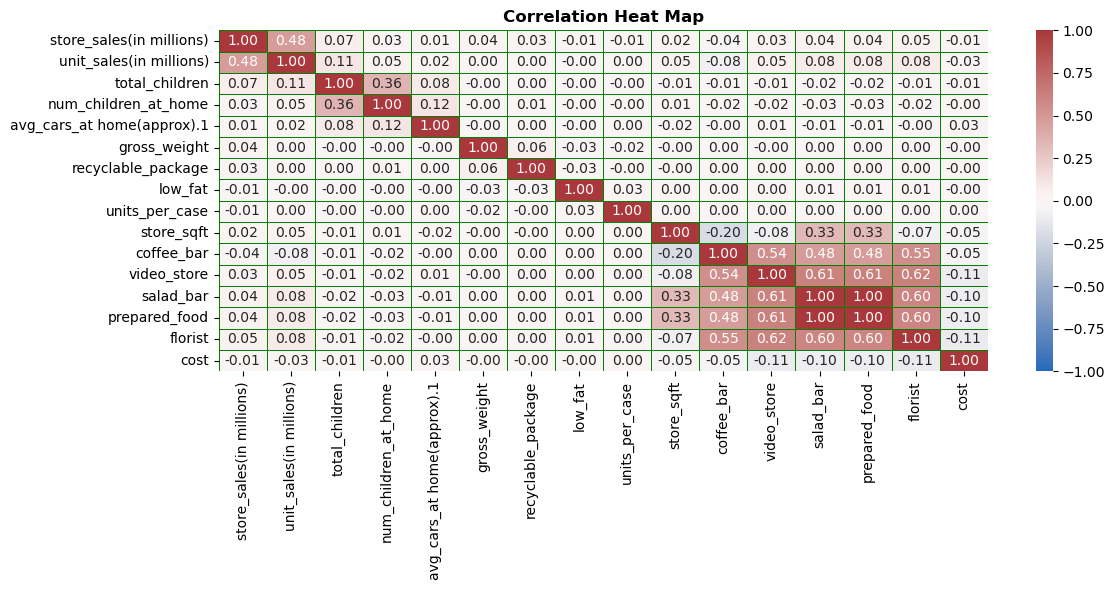

In [23]:
plt.figure(figsize=(12,6))

ax = sns.heatmap(train_df.loc[:, train_df.columns != 'id'].corr(), linecolor='green', linewidth='0.6', cmap="vlag", annot=True, fmt=".2f", vmin=-1, vmax=1)
ax.set_title('Correlation Heat Map', weight='bold')

plt.tight_layout()
plt.show()

CONSEQUENCES : Cost is not strongly correlated to any feature,
Perfect correlation between salad_bar and prepared_food. Will drop one of these during feature engineering.

CONTİNOUS DATA : Continuous data is data that can take any value. Height, weight, temperature and length are all examples of continuous data.

What is a violin plot? A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks("zirveler") in the data. It is used to visualize the distribution of numerical data. Unlike a box plot that can only show summary statistics, violin plots depict summary statistics and the density of each variable.

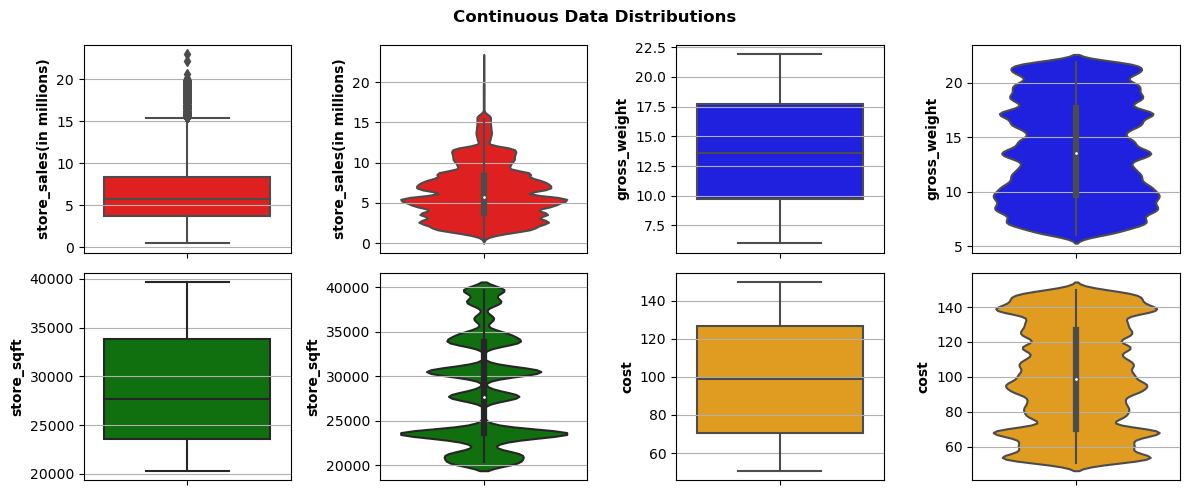

In [31]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12,5))
row = 0
col = 0
crs = ["red","blue","green","orange"]
for i, cc in enumerate(['store_sales(in millions)', 'gross_weight', 'store_sqft', 'cost']):
    ax = sns.boxplot(data = train_df , y = cc ,  ax=axs[row, col], color=crs[i])
    ax.yaxis.grid()
    ax.set_ylabel(cc, weight='bold')
    
    ax = sns.violinplot(data=train_df, y=cc, ax=axs[row, col+1], color=crs[i])
    ax.yaxis.grid()
    ax.set_ylabel(cc, weight='bold')
    
    if col+1 == 3:
        col = 0
        row += 1
    else:
        col += 2
    
    


    
    
        
fig.suptitle('Continuous Data Distributions', weight='bold')
fig.tight_layout()
plt.show()    

True/False Data : 

aşağıdaki işlem ile bilabel olan kategorik columnslardan true false şeklinde veri sayısına ulaşabiliriz istediğimiz şey oranlar ldugu için countplot kullanırız

neden meltliyoruz öncesinde ona bak ve buraya yaz : 

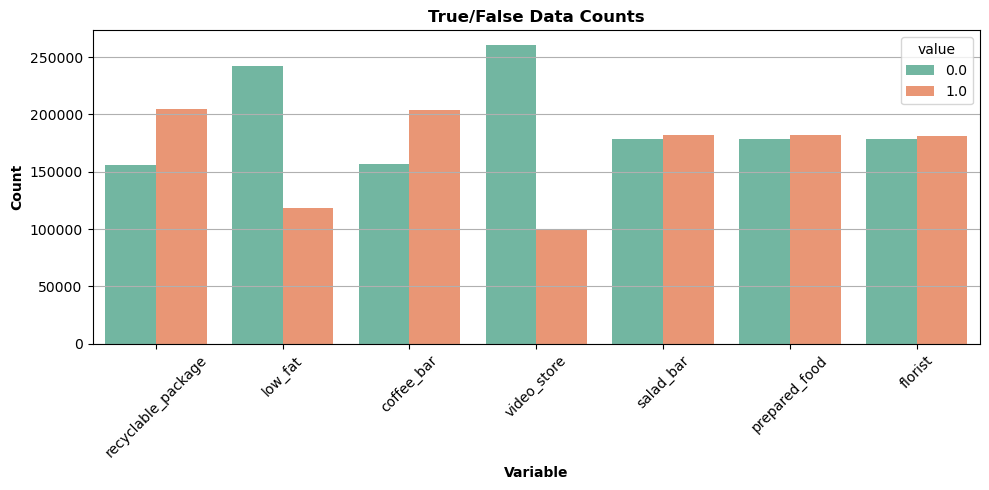

In [43]:
# Want to get counts for True/False features

# Start by melting a sub-dataframe for those features
train_dff = pd.melt(train2_df, id_vars=["id"], value_vars=['recyclable_package', 'low_fat', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist'])

plt.figure(figsize=(10,5))
cmap = sns.color_palette('Set2')

ax = sns.countplot(data=train_dff, x='variable', hue='value', palette=cmap)
ax.yaxis.grid()
ax.set_ylabel('Count', weight='bold')
ax.set_xlabel('Variable', weight='bold')    
ax.set_title('True/False Data Counts', weight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()